## Homework #3, 4 @AyrapetyanGrigory


In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt


## #3

Импортируем Dataset "Titanic", с которым будем работать:

In [7]:
df = pd.read_csv("Titanic.csv")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Узнаем, какая у него размерность:

In [8]:
df.shape

(891, 12)

Выведем,сколько уникальных значений в датасете:


In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Количество значений NaN в столбцах:

In [10]:
np.sum(df.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Интерполируем (избавимся от значений NaN):

In [11]:
df = df.interpolate()

Снова выведем, сколько осталось значений NaN:

In [12]:
np.sum(df.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Применим One-hot Encoding и для столбца "Sex":

In [13]:
new_sex = pd.get_dummies(df["Sex"])
new_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [14]:
new_e = pd.get_dummies(df["Embarked"])
new_e

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Избавимся от столбцов "Embarked", "Sex"(его мы представили в виде One-hot Encoding и присоединим к датасету попозже), "Name", "Cabin", "Ticket":

In [15]:
df = df.drop(["Embarked", "Sex","Name", "Cabin", "Ticket"], axis = 1)

Объединим получившийся One-hot Encoding столбца "Sex" с изначальным датасетом df:

In [16]:
df = pd.concat([df, new_sex], axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1
887,888,1,1,19.0,0,0,30.0000,1,0
888,889,0,3,22.5,1,2,23.4500,1,0
889,890,1,1,26.0,0,0,30.0000,0,1


Разобьем данные на тренировочные и тестовые:

In [17]:
X_train = df.drop("Survived", axis = 1).values[:620]
Y_train = df["Survived"].values[:620]

X_test = df.drop("Survived", axis = 1).values[620:]
Y_test = df["Survived"][620:].values

Обучим нашу модель на тестовых данных:

In [18]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()

mdl.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Выполним предсказания на тестовых данных (Features):

In [19]:
Y_pred = mdl.predict(X_test)

Выполним предсказания на тренировочных данных:

In [20]:
Y_pred_train = mdl.predict(X_train)

Импортируем "Explained Variance Score":

In [21]:
from sklearn.metrics import explained_variance_score

Оценим регрессию тестировочных данных при помощи "explained_variance_score":

In [22]:
explained_variance_score(Y_test, Y_pred)

0.3847866031246323

Оценим регрессию тренировочных данных при помощи "explained_variance_score":

In [23]:
explained_variance_score(Y_train, Y_pred_train)

0.3897245079797007

Попробуем оценить модель через Accuracy Score:

Импортируем SGDClassifier и accuracy_score:

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

Обучим модель через SGDClassifier:

In [25]:
clf = SGDClassifier(verbose = 2, max_iter = 3)

In [26]:
clf.fit(X_train, Y_train)

-- Epoch 1
Norm: 3730.20, NNZs: 8, Bias: -122.408165, T: 620, Avg. loss: 224127.656997
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3389.47, NNZs: 8, Bias: -136.232803, T: 1240, Avg. loss: 144872.049673
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3168.98, NNZs: 8, Bias: -158.466440, T: 1860, Avg. loss: 116838.151633
Total training time: 0.00 seconds.


c:\users\ayrapetyan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=3,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

Оценим модель через "np.mean":

In [27]:
train_accuracy = np.mean(Y_train == clf.predict(X_train))
test_accuracy = np.mean(Y_test == clf.predict(X_test))

print("train accuracy: {}".format(train_accuracy))
print("test accuracy: {}".format(test_accuracy))

train accuracy: 0.614516129032258
test accuracy: 0.6715867158671587


Оценим модель через "accuracy_score":

In [28]:
acc_score_train = accuracy_score(Y_train, clf.predict(X_train))
acc_score_test = accuracy_score(Y_test, clf.predict(X_test))

print("train accuracy: {}".format(acc_score_train))
print("test accuracy: {}".format(acc_score_test))

train accuracy: 0.614516129032258
test accuracy: 0.6715867158671587


## #4

Выведем наш датасет:

In [29]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1
887,888,1,1,19.0,0,0,30.0000,1,0
888,889,0,3,22.5,1,2,23.4500,1,0
889,890,1,1,26.0,0,0,30.0000,0,1


Построим график зависимости выживших от их возраста:

<function matplotlib.pyplot.show(*args, **kw)>

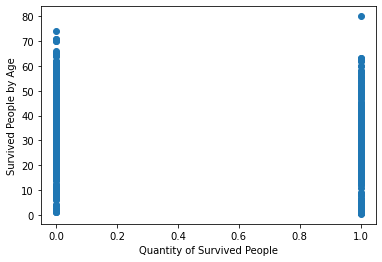

In [30]:
import matplotlib.pyplot as plt 
plt.plot(df["Survived"], df["Age"], "o")
plt.xlabel("Quantity of Survived People")
plt.ylabel("Survived People by Age")
plt.show

Построим гистограмму по столбцу "Age":

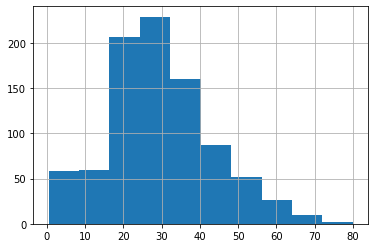

In [31]:
df["Age"].hist()

Построим гистограмму по столбцу "Survived":

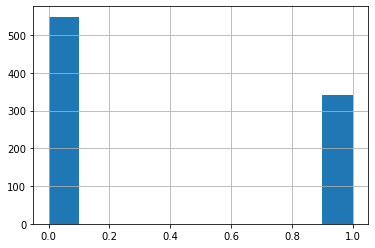

In [32]:
df["Survived"].hist()

Нормализируем наши данные:

(array([ 58.,  60., 207., 229., 160.,  87.,  52.,  26.,  10.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

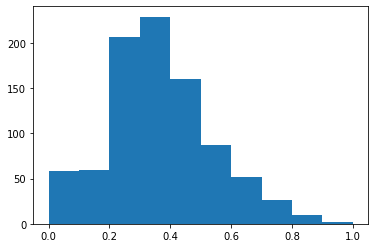

In [33]:
plt.hist((df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min()))

## Дополненное 4 задание

Используем Seaborn вместо Matplotlib:


Импортируем сам Seaborn:

In [34]:
import seaborn as sns

Построим гистограмму по столбцу "Age" при помощи distplot:

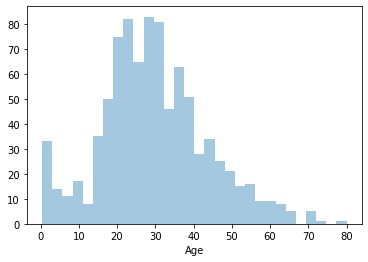

In [35]:
sns.distplot(df["Age"], kde = False, bins = 30)

Построим гистограмму по столбцу "Survived" при помощи "distplot":

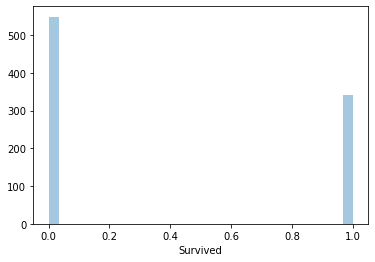

In [36]:
sns.distplot(df["Survived"], kde = False, bins = 30)

Попробуем показать совместное распределение по "Age" и "Survived":

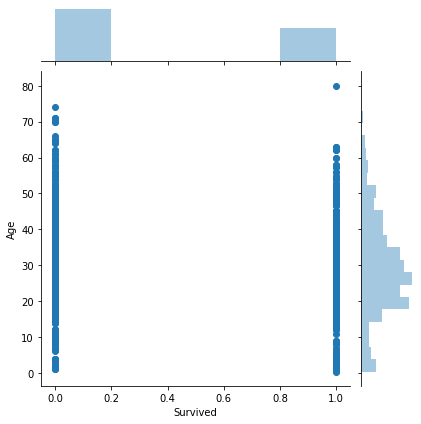

In [43]:
sns.jointplot(x = df["Survived"], y = df["Age"], kind = "scatter")

Создадим несколько графиков в одной ячейке:

[[], [], Text(0.5, 1.0, 'Survived Hist')]

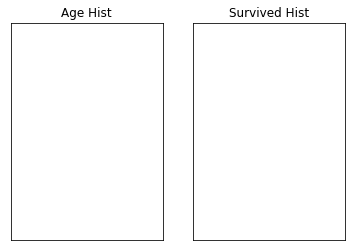

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set(title = "Age Hist", xticks = [], yticks = [] )
ax2.set(title = "Survived Hist", xticks = [], yticks = [])